In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras import optimizers
from keras import models
from keras import layers
import tensorflow as tf
from keras import Sequential
from sklearn.metrics import log_loss


df = pd.read_excel (r'./feed_matrix.xlsx')
data = np.array(df)
feed = data[:,:47]
target = data[:,52]
non_dim_input = (feed - np.min(feed,axis = 0))/(np.max(feed , axis = 0) - np.min(feed , axis = 0))

def sigmoid_basic (x):
    return  1/(1+np.exp(-x))
def sigmoid (x , slope=10):
    return sigmoid_basic (slope*(x-0.5))

non_dim_target = sigmoid(target  , 70)

non_dim_input[:,:3] = feed[:,:3]


In [1]:
x = np.linspace(0,1,100)
plt.plot(x , sigmoid(x,50))

In [779]:
XX_train, X_test, yy_train, y_test = train_test_split( 
non_dim_input, non_dim_target, test_size = 0.15, random_state = 10)

train_number = np.size(XX_train , axis = 0)
validation = 0.12
X_train = XX_train[:np.round((1-validation)*train_number).astype(int),:]
y_train = yy_train[:np.round((1-validation)*train_number).astype(int)]
X_val = XX_train[np.round((1-validation)*train_number).astype(int):,:]
y_val = yy_train[np.round((1-validation)*train_number).astype(int):]


print('Shape of x_tr: ' + str(X_train.shape))
print('Shape of y_tr: ' + str(y_train.shape))
print('Shape of x_val: ' + str(X_val.shape))
print('Shape of y_val: ' + str(y_val.shape))
print('Shape of x_test: ' + str(X_test.shape))
print('Shape of y_test: ' + str(y_test.shape))


model = models.Sequential()
model.add(tf.keras.layers.Dense(units=17,activation="tanh"))
model.add(tf.keras.layers.Dense(units=15,activation="tanh"))
model.add(tf.keras.layers.Dense(units=1,activation="tanh"))
model.compile(optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=70)#, batch_size=10)


Shape of x_tr: (18860, 47)
Shape of y_tr: (18860,)
Shape of x_val: (2572, 47)
Shape of y_val: (2572,)
Shape of x_test: (3783, 47)
Shape of y_test: (3783,)
Epoch 1/70
590/590 [==============================] - 3s 4ms/step - loss: 0.1663 - mse: 0.1663 - val_loss: 0.1630 - val_mse: 0.1630
Epoch 2/70
590/590 [==============================] - 2s 4ms/step - loss: 0.1566 - mse: 0.1566 - val_loss: 0.1514 - val_mse: 0.1514
Epoch 3/70
590/590 [==============================] - 2s 4ms/step - loss: 0.1458 - mse: 0.1458 - val_loss: 0.1427 - val_mse: 0.1427
Epoch 4/70
590/590 [==============================] - 2s 3ms/step - loss: 0.1403 - mse: 0.1403 - val_loss: 0.1395 - val_mse: 0.1395
Epoch 5/70
590/590 [==============================] - 2s 4ms/step - loss: 0.1383 - mse: 0.1383 - val_loss: 0.1387 - val_mse: 0.1387
Epoch 6/70
590/590 [==============================] - 3s 4ms/step - loss: 0.1370 - mse: 0.1370 - val_loss: 0.1380 - val_mse: 0.1380
Epoch 7/70
590/590 [==============================] -

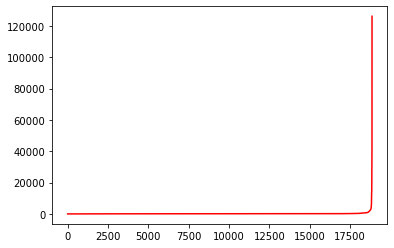

In [780]:
precision_train = model.predict(X_train, verbose=0)
real_precision_train = precision_train*(np.max(target , axis = 0) - np.min(target , axis = 0))+ np.min(target,axis = 0)
real_y_train = y_train*(np.max(target , axis = 0) - np.min(target , axis = 0))+ np.min(target,axis = 0)
real_comp_train = np.hstack((real_precision_train.reshape(-1,1),real_y_train.reshape(-1,1)))
#plt.scatter(np.arange(len(y_train)),comp_train[:,0], c ='blue', marker='x')
#plt.scatter(np.arange(len(y_train)),comp_train[:,1], c ='red', marker='+')
error_train = (np.sort(np.abs((real_comp_train[:,0] - real_comp_train[:,1])/real_comp_train[:,0])*100))
#error_train = ((np.abs((real_comp_train[:,0] - real_comp_train[:,1])/real_comp_train[:,0])*100))

plt.plot(np.arange(len(error_train)),error_train, c ='red')



In [6]:
precision_val = model.predict(X_val, verbose=0)
real_precision_val = precision_val*(np.max(target , axis = 0) - np.min(target , axis = 0))+ np.min(target,axis = 0)
real_y_val = y_val*(np.max(target , axis = 0) - np.min(target , axis = 0))+ np.min(target,axis = 0)
real_comp_val = np.hstack((real_precision_val.reshape(-1,1),real_y_val.reshape(-1,1)))
#plt.scatter(np.arange(len(y_train)),comp_train[:,0], c ='blue', marker='x')
#plt.scatter(np.arange(len(y_train)),comp_train[:,1], c ='red', marker='+')
error_val = (np.sort(np.abs((real_comp_val[:,0] - real_comp_val[:,1])/real_comp_val[:,0])*100))
plt.plot(np.arange(len(error_val)),error_val, c ='red')


In [7]:

precision_test = model.predict(X_test, verbose=0)
real_precision_test = precision_test*(np.max(target , axis = 0) - np.min(target , axis = 0))+ np.min(target,axis = 0)
real_y_test = y_test

dreal_comp_test = np.hstack((real_precision_test.reshape(-1,1),real_y_test.reshape(-1,1)))
error_test = (np.sort(np.abs((real_comp_test[:,0] - real_comp_test[:,1])/real_comp_test[:,0])*100))
diff_test = (np.sort(np.abs((real_comp_test[:,0] - real_comp_test[:,1]))))
plt.plot(np.arange(len(error_test)),error_test, c ='red')


In [559]:
real_comp_test

array([[0.04808411, 0.        ],
       [0.06021276, 0.        ],
       [0.98607916, 0.99767958],
       ...,
       [0.31576434, 0.        ],
       [0.28000358, 0.        ],
       [0.61877137, 0.20606024]])

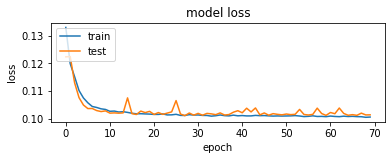

In [591]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

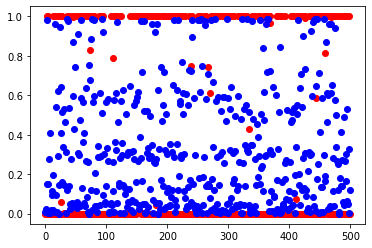

In [783]:
plt.scatter(np.arange(len(real_y_test[:500])),real_y_test[:500], c ='red')
plt.scatter(np.arange(len(real_precision_test[:500])),real_precision_test[:500], c ='blue')


0.23466282397014634

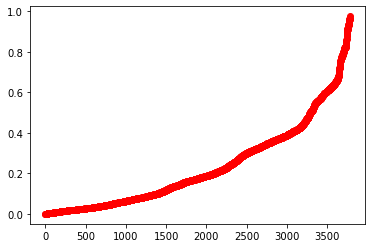

In [592]:
error_test = (np.sort(np.abs((real_comp_test[:,0] - real_comp_test[:,1]))))

plt.scatter(np.arange(len(error_test)),error_test, c ='red')
np.mean(error_test)

In [483]:
bish = np.max(error_test)
print(bish)
np.where(error_test==bish)

0.999644011259109


(array([3782], dtype=int64),)

In [486]:
real_comp_test[3781,:]

array([0.12245107, 0.04902554])

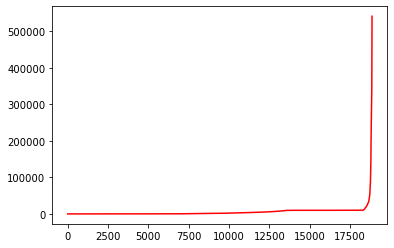

In [494]:
precision_train = model.predict(X_train, verbose=0)
real_precision_train = precision_train
real_y_train = y_train
real_comp_train = np.hstack((real_precision_train.reshape(-1,1),real_y_train.reshape(-1,1)))
error_train = (np.sort(np.abs((real_comp_train[:,0] - real_comp_train[:,1])/real_comp_train[:,0])*100))
plt.plot(np.arange(len(error_train)),error_train, c ='red')



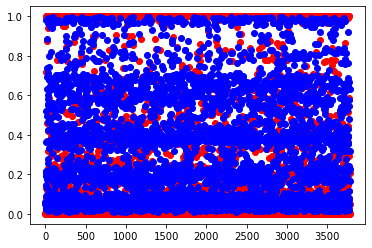

In [593]:
plt.scatter(np.arange(len(real_y_test)),real_y_test, c ='red')
plt.scatter(np.arange(len(real_precision_test)),real_precision_test, c ='blue')


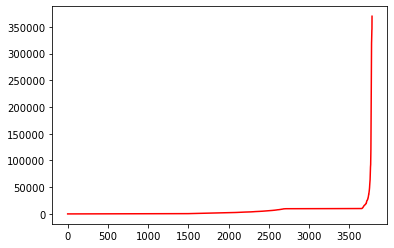

In [496]:
precision_test = model.predict(X_test, verbose=0)
real_precision_test = precision_test
real_y_test = y_test
#plt.scatter(np.arange(len(y_train)),comp_train[:,0], c ='blue', marker='x')
#plt.scatter(np.arange(len(y_train)),comp_train[:,1], c ='red', marker='+')
real_comp_test = np.hstack((real_precision_test.reshape(-1,1),real_y_test.reshape(-1,1)))
error_test = (np.sort(np.abs((real_comp_test[:,0] - real_comp_test[:,1])/real_comp_test[:,0])*100))
diff_test = (np.sort(np.abs((real_comp_test[:,0] - real_comp_test[:,1]))))
plt.plot(np.arange(len(error_test)),error_test, c ='red')



(array([1.1631e+04, 1.1470e+03, 6.8400e+02, 4.9500e+02, 3.1400e+02,
        9.4000e+01, 4.6000e+01, 7.0000e+00, 0.0000e+00, 4.1730e+03]),
 array([1.92418439e-20, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

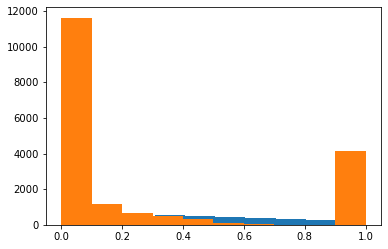

In [594]:
plt.hist(target[feed[:,4] ==0])
plt.hist(target[feed[:,4] >0])


In [534]:
r2_score(target,-feed[:,4])

-0.7695478510879421

In [540]:
import scipy
def corr (x,y):
    return scipy.stats.pearsonr(x,y)[0]
    

In [542]:
(corr(target,-feed[:,4]))**2

0.12766240441583102

In [571]:
r2_score(real_comp_test[:,1] , real_comp_test[:,0]) 

0.4409121708344751

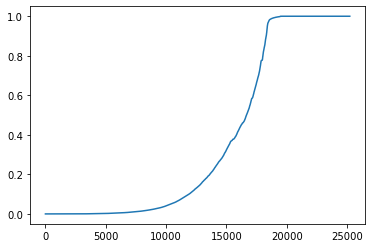

In [752]:
plt.plot(np.sort(target))

(array([896., 500., 349., 528., 271., 358., 375., 140., 110., 256.]),
 array([0.01548023, 0.1135944 , 0.21170858, 0.30982274, 0.40793693,
        0.5060511 , 0.60416526, 0.70227945, 0.80039364, 0.8985078 ,
        0.99662197], dtype=float32),
 <BarContainer object of 10 artists>)

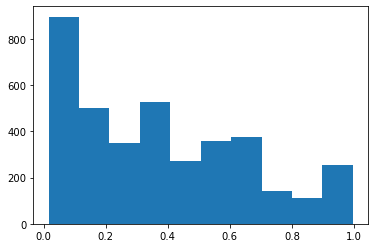

In [564]:
plt.hist(real_precision_test)

(array([11892.,  1727.,  1167.,  1039.,   830.,   561.,   436.,   362.,
          277.,  6924.]),
 array([1.92418439e-20, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

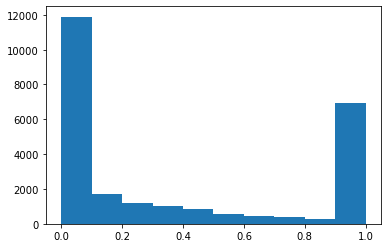

In [751]:
plt.hist(target)

In [674]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(real_y_test ,real_precision_test))
print(mean_squared_error(real_y_train ,real_precision_train))


0.0998722021283494
0.1001310060258055


In [682]:
y_true = real_y_train
y_pred = real_precision_train[:,0]


In [715]:
r2_score(y_true,y_pred)

0.43855277186538544